Chi-Yun, before start running, please go the "files" section. It is at the left of this page; then clic on uploading the file, to upload the data that recently you shared with me. After you upload the data, you can run the code:)

# Topic Modelling using Latent-Dirichlet Allocation



In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=0667267334b6ecca5fccf58119516a323e6b7c0a934ea155b6fc6d09ca10f04e
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
!pip install --upgrade numpy scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:

!python -m spacy download en_core_web_lg  ## restart once download is complete.


2023-05-18 11:28:27.227256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 11:28:29.913222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!pip install numpy scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## additional installations in colab

## general imports

import numpy as np
import pandas as pd

In [ ]:
!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

if you get error here, try this:
Go to "Runtime" (above)

hit "Restart Run time"

Then run the previous cell again

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy
from spacy import displacy

import pyLDAvis
# from pyLDAvis import sklearn
pyLDAvis.enable_notebook()

ModuleNotFoundError: ignored

In [ ]:
import h5py
import numpy as np
import pandas as pd
dataset = h5py.File('/content/LH_VMSC02001_adata_sub01.h5ad', 'r') #this is the path to the data



In [ ]:
dataset.keys()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<KeysViewHDF5 ['X', 'layers', 'obs', 'obsm', 'obsp', 'uns', 'var', 'varm', 'varp']>

In [ ]:
grid = dataset['obs']
grid.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<KeysViewHDF5 ['_index', 'index', 'n_genes']>

In [ ]:
print("n_genes data: {}".format(grid['n_genes']))
print("n_genes data attributes: {}".format(list(grid['n_genes'].attrs)))

n_genes data: <HDF5 dataset "n_genes": shape (84150,), type "<i8">
n_genes data attributes: ['encoding-type', 'encoding-version']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install anndata
import anndata

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
adata = anndata.read_h5ad("/content/LH_VMSC02001_adata_sub01.h5ad")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = adata.to_df()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# from scipy.sparse import csr_matrix


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# my_sparse_matrix = csr_matrix(adata)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# adata = my_sparse_matrix

In [ ]:
# df = pd.DataFrame(adata.X.todense(), index=adata.obs.index, columns=adata.var.index)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# for col in adata.obs.columns:
#     df[col] = adata.obs[col]

# for col in adata.var.columns:
#     df[col] = adata.var[col]

In [ ]:
# ### Reading the dataset from path

# filename = '/content/011 [MConverter.eu].json'
# data = pd.read_json(filename)
# data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of         PDK4  CCL26  CX3CL1  PGLYRP1   CD4  SNAI2  TNFRSF17  ICAM3  TBX21   
595728   3.0    0.0     1.0      1.0   0.0    3.0       0.0    3.0    1.0  \
627385   6.0    2.0     7.0      1.0   3.0    6.0       5.0    4.0    0.0   
62980    2.0    1.0     3.0      0.0   1.0    0.0       0.0    4.0    1.0   
396965   1.0    3.0     1.0      0.0  11.0   10.0      29.0    5.0    0.0   
318812   7.0    2.0     2.0      0.0   0.0    4.0       0.0   12.0    5.0   
...      ...    ...     ...      ...   ...    ...       ...    ...    ...   
396129   4.0    1.0     1.0      0.0  25.0    2.0       8.0   17.0    3.0   
595844   8.0    1.0     0.0      2.0   8.0    2.0       7.0    3.0    2.0   
156475   3.0    2.0     4.0      0.0   1.0    3.0       1.0    7.0    3.0   
598063   1.0    0.0     1.0      1.0   1.0    0.0       1.0    4.0    5.0   
398099   5.0    2.0     0.0      0.0   7.0    0.0       6.0   14.0    0.0   

        FAP  ...  IL17A  NOTCH1  TP63  CCL28 

In [ ]:
### get the shape of the data

df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(84150, 500)

In [ ]:
column_names = df.columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
column_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['PDK4',
 'CCL26',
 'CX3CL1',
 'PGLYRP1',
 'CD4',
 'SNAI2',
 'TNFRSF17',
 'ICAM3',
 'TBX21',
 'FAP',
 'NFKB2',
 'LAG3',
 'TGFBR3',
 'MMP11',
 'XBP1',
 'IL2RB',
 'CTSG',
 'GZMH',
 'GZMB',
 'NFKBIA',
 'MMP2',
 'CCL22',
 'TSC2',
 'TGFB1',
 'CD79A',
 'NKG7',
 'HGF',
 'SERPINE1',
 'ACTA2',
 'MPO',
 'CSF3',
 'WNT3',
 'CCL2',
 'CCL1',
 'COL1A1',
 'VTN',
 'NFKB1',
 'CCND1',
 'IL23A',
 'CDKN1B',
 'IFNG',
 'KLRB1',
 'LOX',
 'GZMK',
 'IL12B',
 'SELL',
 'TGFB3',
 'DUSP1',
 'EGR1',
 'KLRK1',
 'TNFSF10',
 'CXCR4',
 'TWIST1',
 'LRP1',
 'SNAI1',
 'CEACAM8',
 'CDKN1A',
 'SOX9',
 'TNFSF9',
 'CD70',
 'FFAR2',
 'CCR7',
 'KLF2',
 'SMO',
 'RAF1',
 'PLVAP',
 'BST2',
 'LGR6',
 'CCNB1',
 'PDGFRA',
 'APC',
 'TBX3',
 'CDK4',
 'IL6',
 'BLK',
 'FGFBP2',
 'TLR2',
 'MMP7',
 'LYZ',
 'LRP6',
 'VWF',
 'PROX1',
 'CDH1',
 'PDGFRB',
 'FLT4',
 'CREBBP',
 'IL1B',
 'BRD4',
 'ELANE',
 'EPCAM',
 'AKT3',
 'GNLY',
 'KDR',
 'PIK3CA',
 'LAMC2',
 'MCM6',
 'FGF2',
 'STAT3',
 'ICAM1',
 'PPARGC1A',
 'CXCL9',
 'MCM2',
 'MSH3',
 'EGF',


In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

In [ ]:
import pandas as pd


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

NameError: ignored

In [ ]:
# df[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_corpus(df):
    corpus = []
    for row in df.iterrows():
        doc = row[1].values.tolist()
        corpus.append(doc)
    return corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.corpora import Dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents = [list(row.dropna().astype(str).values) for _, row in df.iterrows()]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# create dictionary and corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Try it with number of topics = 2

In [ ]:
# train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=2,
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print topics
print(lda_model.print_topics(num_words=3))

[(0, '0.781*"0.0" + 0.155*"1.0" + 0.033*"2.0"'), (1, '0.174*"1.0" + 0.124*"2.0" + 0.081*"3.0"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model
result_dist=lda_model[corpus]
topic_info=lda_model.get_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
K=20
prop = np.empty((len(corpus),K), float)#pd.DataFrame([])
for ii in range(len(corpus)):
    #dic={}
    rr=np.zeros(K)
    result=np.array(result_dist[ii][0])
    rr[result[:,0].astype(int)]=result[:,1]
    rr=np.reshape(rr,(1,K))
    prop[ii,:]=rr
    #prop=np.append(prop, rr, axis=0)
    print(ii)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
79150
79151
79152
79153
79154
79155
79156
79157
79158
79159
79160
79161
79162
79163
79164
79165
79166
79167
79168
79169
79170
79171
79172
79173
79174
79175
79176
79177
79178
79179
79180
79181
79182
79183
79184
79185
79186
79187
79188
79189
79190
79191
79192
79193
79194
79195
79196
79197
79198
79199
79200
79201
79202
79203
79204
79205
79206
79207
79208
79209
79210
79211
79212
79213
79214
79215
79216
79217
79218
79219
79220
79221
79222
79223
79224
79225
79226
79227
79228
79229
79230
79231
79232
79233
79234
79235
79236
79237
79238
79239
79240
79241
79242
79243
79244
79245
79246
79247
79248
79249
79250
79251
79252
79253
79254
79255
79256
79257
79258
79259
79260
79261
79262
79263
79264
79265
79266
79267
79268
79269
79270
79271
79272
79273
79274
79275
79276
79277
79278
79279
79280
79281
79282
79283
79284
79285
79286
79287
79288
79289
79290
79291
79292
79293
79294
79295
79296
79297
79298
79299
79300
79301
79302
79303
79304
79305
79306
79307
7

In [ ]:
clusters=[]
for ii in range(prop.shape[0]):
    clusters.append(prop[ii,:].argmax())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
adata.obs['LDA_cluster']=clusters
adata.obs=adata.obs.astype({'LDA_cluster':'category'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install scanpy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scanpy as sc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


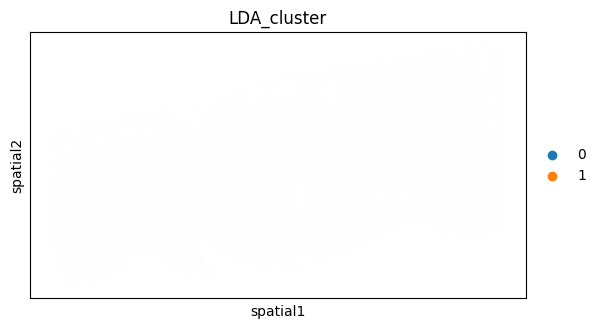

In [ ]:
sc.pl.spatial(adata, spot_size=20, color=['LDA_cluster'])

In [ ]:
sc.pl.spatial(adata_sub, spot_size=20, color=['LDA_cluster'], show=False,
                     save="_spatial_clustering_LH_VMSC02001_p20.pdf")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

Try it with number of topics = 20

In [ ]:
# train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=20,
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [ ]:
# print topics
print(lda_model.print_topics(num_words=3))

[(0, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (1, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (2, '0.563*"1.0" + 0.211*"0.0" + 0.073*"2.0"'), (3, '0.115*"4.0" + 0.092*"11.0" + 0.064*"3.0"'), (4, '0.938*"0.0" + 0.059*"1.0" + 0.003*"2.0"'), (5, '0.233*"1.0" + 0.095*"20.0" + 0.058*"16.0"'), (6, '0.393*"19.0" + 0.121*"1.0" + 0.098*"28.0"'), (7, '0.085*"81.0" + 0.037*"3.0" + 0.027*"1.0"'), (8, '0.025*"3.0" + 0.015*"130.0" + 0.014*"127.0"'), (9, '0.143*"13.0" + 0.116*"1.0" + 0.095*"24.0"'), (10, '0.139*"1.0" + 0.081*"25.0" + 0.058*"12.0"'), (11, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (12, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (13, '0.136*"3.0" + 0.120*"5.0" + 0.101*"6.0"'), (14, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (15, '0.238*"210.0" + 0.104*"348.0" + 0.087*"352.0"'), (16, '0.061*"3.0" + 0.060*"2.0" + 0.044*"1.0"'), (17, '0.471*"2.0" + 0.202*"1.0" + 0.094*"3.0"'), (18, '0.175*"450.0" + 0.144*"407.0" + 0.095*"514.0"'), (19, '0

Try it with number of topics = 200

In [ ]:
# train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=200,
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [ ]:
# print topics
print(lda_model.print_topics(num_words=3))

[(149, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (195, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (165, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (151, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (106, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (153, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (32, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (46, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (84, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (26, '0.001*"1502.0" + 0.001*"1078.0" + 0.001*"1068.0"'), (122, '0.450*"74.0" + 0.218*"101.0" + 0.127*"130.0"'), (47, '0.455*"7.0" + 0.111*"1.0" + 0.068*"2.0"'), (120, '0.266*"5.0" + 0.116*"19.0" + 0.115*"1.0"'), (124, '0.052*"3.0" + 0.037*"2.0" + 0.017*"53.0"'), (135, '0.520*"2.0" + 0.207*"1.0" + 0.134*"0.0"'), (98, '0.125*"8.0" + 0.093*"4.0" + 0.075*"2.0"'), (66, '0.092*"2.0" + 0.063*"1.0" + 0.055*"3.0"'), (77, '0.248*"3.0" + 0.141*"4.0" + 0.109*"1.0"'), (136, '0.7